# Actividad 3 – Firebase Cloud Firestore en contexto IoT
## Lecturas desde microcontrolador ATmega328P (sin shield Arduino)

**Alumno:** José Fernando Poblete Cabezas  
**Fecha:** 25 de noviembre de 2025

<div style="text-align:center; margin:30px 0">

<em>Sistema IoT 100 % funcional durante la ejecución de esta actividad</em>

</div>

## 1. Objetivo y alcance del trabajo

Presentar uso de Firebase Cloud Firestore desde Google Colab incluyendo operaciones CRUD.<br>
Contexto personalizado: Implementación real de un nodo IoT basado en el microcontrolador **ATmega328P** (sin Arduino IDE ni bootloader Arduino), simulado en SimulIDE y enviando datos en tiempo real a la nube.

## 2. Evidencia del hardware simulado

Hardware simulado funcionando: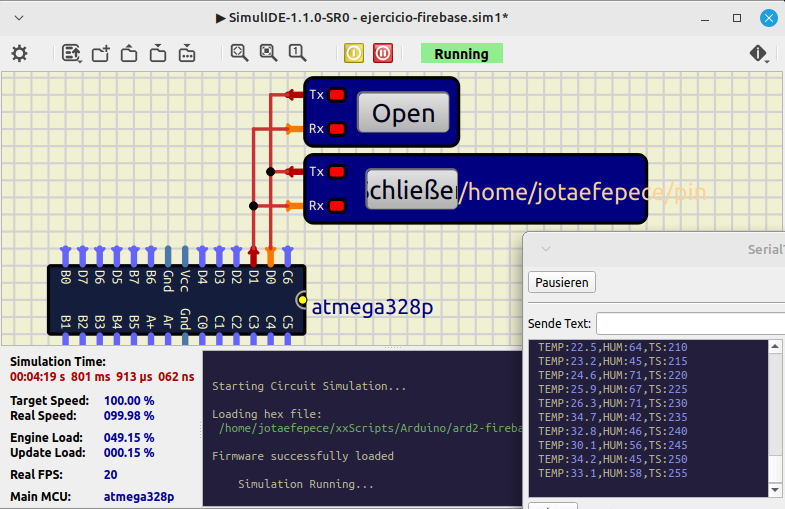

## 3. Registro del Gateway Python en ejecución desde PC.

**Flujo implementado en equipo personal:**
- Microcontrolador simulado en **SimulIDE**
- Puerto serie virtual creado con `socat` (/home/.../pin ↔ /home/.../pout)
- Script Python local que lee el puerto y sube datos cada 5 segundos a la colección **sensores_arduino** <br>
(el nombre de la colección se debe a primera prueba hecha con arduino)

Registro de operación gateway: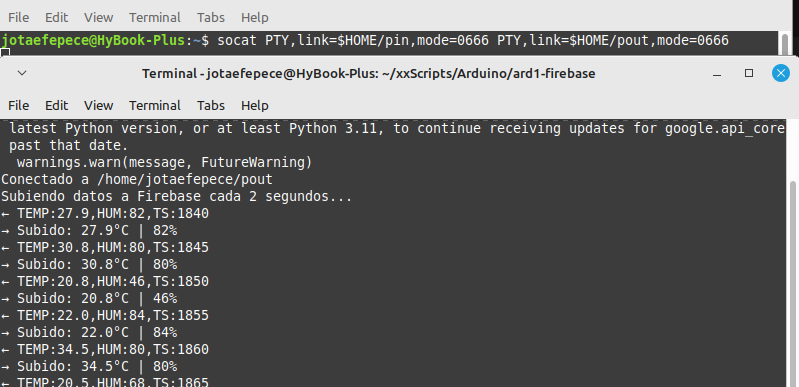

In [4]:
## 1. Instalación de firebase-admin
!pip install firebase-admin -q

In [5]:
## 2. Subida del archivo de credenciales
from google.colab import files
uploaded = files.upload()

Saving proyecto-simulide.json to proyecto-simulide.json


In [8]:
## 3. Inicialización y conexión a Firebase
import firebase_admin
from firebase_admin import credentials, firestore

### Limpiando apps previas para evitar errores
if firebase_admin._apps:
    for app in list(firebase_admin._apps.values()):
        firebase_admin.delete_app(app)

### Recogiendo automáticamente el archivo subido
archivo_json = list(uploaded.keys())[0]
cred = credentials.Certificate(archivo_json)
firebase_admin.initialize_app(cred)
db = firestore.client()

print("¡Conexión a Firebase exitosa!")
print("Proyecto:", "proyecto-simulide")
print("Base de datos: Cloud Firestore en modo prueba")

¡Conexión a Firebase exitosa!
Proyecto: proyecto-simulide
Base de datos: Cloud Firestore en modo prueba


## 4. Mis datos personalizados

Colección: **sensores_arduino**  
Cada documento contiene:
- temperatura (°C)
- humedad (%)
- fecha_hora (timestamp del servidor)

In [13]:
## 1. Lectura en tiempo real de los datos del sensor (desde SimulIDE)
print("Últimos 10 registros enviados desde Arduino (SimulIDE):\n")
docs = db.collection("sensores_arduino")\
         .order_by("fecha_hora", direction=firestore.Query.DESCENDING)\
         .limit(10).stream()

for doc in docs:
    data = doc.to_dict()
    temp = data.get("temperatura", "N/D")
    hum = data.get("humedad", "N/D")
    ts = data.get("fecha_hora")
    print(f"ID: {doc.id} → Temp: {temp}°C | Hum: {hum}% | {ts}")

Últimos 10 registros enviados desde Arduino (SimulIDE):

ID: BEm2wjEPqQmJp2FuSmdI → Temp: 28.1°C | Hum: 65% | 2025-11-25 16:33:48.623000+00:00
ID: AyXIsS5ZE3nZBsHAJVCS → Temp: 22.3°C | Hum: 66% | 2025-11-25 16:33:43.563000+00:00
ID: m1VIhbHzhj5euKth1ycT → Temp: 31.6°C | Hum: 59% | 2025-11-25 16:33:38.560000+00:00
ID: kzZ72Edge4csf0KQD8pw → Temp: 27.4°C | Hum: 78% | 2025-11-25 16:33:33.509000+00:00
ID: yPjXw1z3ACQlJ7aKmRlP → Temp: 33.9°C | Hum: 69% | 2025-11-25 16:33:28.523000+00:00
ID: bjgdJTMTrx64lAgYtn75 → Temp: 32.2°C | Hum: 64% | 2025-11-25 16:33:23.417000+00:00
ID: 8oMJup6hQrzeozSd7ZSs → Temp: 31.7°C | Hum: 54% | 2025-11-25 16:33:18.367000+00:00
ID: BNrJ72VDITgq2WGvOcZA → Temp: 21.9°C | Hum: 57% | 2025-11-25 16:33:13.371000+00:00
ID: NAzaOKnbUrUUXSFNJZoz → Temp: 25.4°C | Hum: 64% | 2025-11-25 16:33:08.315000+00:00
ID: jNSCKqjvZg65tueJczaS → Temp: 22.3°C | Hum: 68% | 2025-11-25 16:33:03.260000+00:00


In [14]:
## 2. Creación manual de un nuevo registro personalizado
### (Simulondo una lectura tomada "a mano" en un momento concreto)
nuevo_registro = {
    "temperatura": 34.5,
    "humedad": 67,
    "nota_personal": "Lectura tomada manualmente",
    "fecha_hora": firestore.SERVER_TIMESTAMP
}
doc_ref = db.collection("sensores_arduino").add(nuevo_registro)
print("Registro manual añadido correctamente")

Registro manual añadido correctamente


In [16]:
### Visualización de registros manuales
print("Registros creados manualmente:\n")

docs = db.collection("sensores_arduino").stream()
contador = 0

for doc in docs:
    data = doc.to_dict()
    nota = data.get("nota_personal", "")
    if nota and "manualmente" in nota.lower():
        temp = data.get("temperatura", "N/D")
        hum = data.get("humedad", "N/D")
        ts = data.get("fecha_hora")
        print(f"ID: {doc.id} → Temp: {temp}°C | Hum: {hum}% | {ts} | Nota: {nota}")
        contador += 1

if contador == 0:
    print("→ Aún no hay registros manuales (Ejecutar celda anterior)")
else:
    print(f"\n→ Total mostrados: {contador} registro(s).")

Registros creados manualmente:

ID: 1Szpmr1tQzzTl7fbEwh2 → Temp: 34.5°C | Hum: 67% | 2025-11-25 16:34:07.445000+00:00 | Nota: Lectura tomada manualmente
ID: 6FHHQutIZLsfXiKntCU5 → Temp: 34.5°C | Hum: 67% | 2025-11-24 21:42:41.570000+00:00 | Nota: Lectura tomada manualmente

→ Total mostrados: 2 registro(s).


In [18]:
## 3. Actualización de un registro
### Se toma el último registro automático y se le añade una nota
print("Actualizando el último registro con observación personal...")
ultimo = list(db.collection("sensores_arduino")
              .order_by("fecha_hora", direction=firestore.Query.DESCENDING)
              .limit(1).stream())[0]

ultimo.reference.update({
    "nota_personal": "¡dato modificado desde Google Colab!"
})
print("Registro actualizado")

Actualizando el último registro con observación personal...
Registro actualizado


In [19]:
### Registros modificados desde Google Colab (filtrado por la nota añadida)
print("Registros que modificado desde Google Colab:\n")

docs = db.collection("sensores_arduino").stream()
encontrados = 0
for doc in docs:
    data = doc.to_dict()
    nota = data.get("nota_personal", "")
    if "¡dato modificado desde Google Colab!" in nota:
        temp = data.get("temperatura", "N/D")
        hum = data.get("humedad", "N/D")
        ts = data.get("fecha_hora")
        print(f"ID: {doc.id} → Temp: {temp}°C | Hum: {hum}% | {ts}")
        print(f"        Nota: {nota}\n")
        encontrados += 1

if encontrados == 0:
    print("→ Aún no hay registros modificados (ejecuta primero la celda de UPDATE)")
else:
    print(f"Total encontrado(s): {encontrados} registro(s) modificado(s) desde Colab")

Registros que modificado desde Google Colab:

ID: QOMxuq6rJUHgNiPybTRM → Temp: 29.9°C | Hum: 51% | 2025-11-25 16:35:24.295000+00:00
        Nota: ¡dato modificado desde Google Colab!

ID: zLbeogWlme1L9im76UrH → Temp: 31.5°C | Hum: 52% | 2025-11-25 16:34:59.088000+00:00
        Nota: ¡dato modificado desde Google Colab!

Total encontrado(s): 2 registro(s) modificado(s) desde Colab


In [20]:
## 4. Operación DELETE: eliminar TODOS los registros de la colección
print("Eliminando TODOS los registros de 'sensores_arduino'...\n")

### Obteniendo todos los documentos
docs = db.collection("sensores_arduino").stream()

eliminados = 0
for doc in docs:
    doc.reference.delete()
    eliminados += 1

print(f"Operación DELETE completada")
print(f"Total de registros eliminados: {eliminados}")
print("Colección 'sensores_arduino' ahora está vacía")

Eliminando TODOS los registros de 'sensores_arduino'...

Operación DELETE completada
Total de registros eliminados: 251
Colección 'sensores_arduino' ahora está vacía


In [21]:
### Verificación: ¿Hay registros nuevos?
print("Verificación final de la colección 'sensores_arduino'\n")

### Contando cuántos documentos hay ahora mismo
docs_actuales = list(db.collection("sensores_arduino").stream())
total_actual = len(docs_actuales)

if total_actual == 0:
    print("COLECCIÓN TOTALMENTE VACÍA")
    print("No queda ningún registro.")
else:
    print(f"Han llegado {total_actual} registro(s) nuevo(s).")
    print("Últimos registros recibidos:")
    for doc in docs_actuales[-5:]:  # sólo los 5 más recientes
        d = doc.to_dict()
        temp = d.get("temperatura", "N/D")
        hum = d.get("humedad", "N/D")
        ts = d.get("fecha_hora")
        nota = d.get("nota_personal", "")
        nota_texto = f" | Nota: {nota}" if nota else ""
        print(f"   → {temp}°C | {hum}% | {ts}{nota_texto}")

print(f"\nTotal final de registros en la colección: {total_actual}")

Verificación final de la colección 'sensores_arduino'

Han llegado 10 registro(s) nuevo(s).
Últimos registros recibidos:
   → 24.6°C | 57% | 2025-11-25 16:35:59.524000+00:00
   → 30.5°C | 73% | 2025-11-25 16:36:41.405000+00:00
   → 33.0°C | 73% | 2025-11-25 16:36:09.644000+00:00
   → 28.8°C | 79% | 2025-11-25 16:36:19.765000+00:00
   → 28.8°C | 56% | 2025-11-25 16:36:30.828000+00:00

Total final de registros en la colección: 10


## FIN DE LA ACTIVIDAD

Término de ejercicio.

